In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
RESULT_PATH = "./result/result.csv"

df_result = pd.read_csv(
    filepath_or_buffer=RESULT_PATH
)

print(df_result.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   round       1000 non-null   int64  
 1   strategy    1000 non-null   object 
 2   c_loss      100 non-null    float64
 3   c_accuracy  1000 non-null   float64
 4   d_accuracy  1000 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 39.2+ KB
None


In [16]:
print(df_result['strategy'].unique())

['Central' 'FedAvg' 'FedAvgM' 'QFedAvg' 'FaultTolerantFedAvg' 'FedOpt'
 'FedProx' 'FedAdagrad' 'FedAdam' 'FedYogi']


In [17]:
df = df_result[df_result['strategy'] == 'FedAvgM'].sort_values(by=['round'])
print(df.head())
print(df['c_loss'].values)

     round strategy  c_loss  c_accuracy  d_accuracy
200      1  FedAvgM     NaN       0.306      0.3252
201      2  FedAvgM     NaN       0.350      0.3668
202      3  FedAvgM     NaN       0.380      0.4024
203      4  FedAvgM     NaN       0.412      0.4176
204      5  FedAvgM     NaN       0.430      0.4516
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


In [18]:
print(sorted(df_result['round'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [19]:
df_loss = pd.DataFrame(index=sorted(df_result['round'].unique()))
df_accuracy = pd.DataFrame(index=sorted(df_result['round'].unique()))


for strategy in df_result['strategy'].unique():
    df = df_result[df_result['strategy'] == strategy].sort_values(by=['round'])
    df_loss[strategy] = df['c_loss'].values
    df_accuracy[strategy] = df['c_accuracy'].values


#print(df_loss.isna().any())
#print(df_accuracy.isna().any())

df_loss = df_loss.drop(['FedAdagrad', 'FedAdam'], axis=1)
df_accuracy = df_accuracy.drop(['FedAdagrad', 'FedAdam'], axis=1)

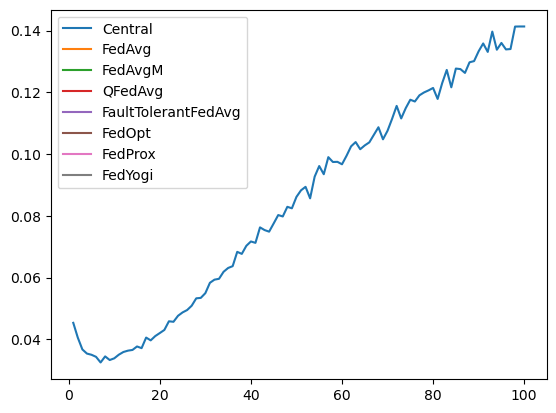

In [20]:
line_loss = df_loss.plot.line()

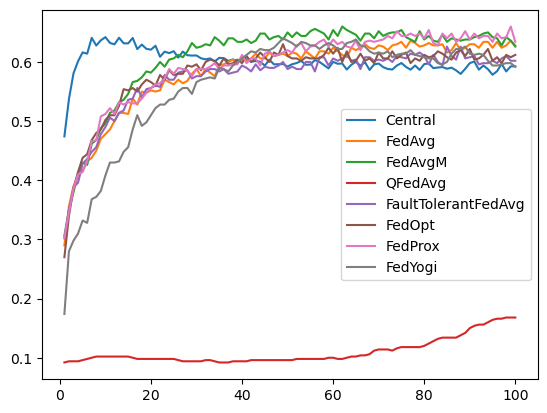

In [21]:
line_accuracy = df_accuracy.plot.line()